### 🎯 Loan Eligibility Prediction

This project aims to predict whether a loan applicant is eligible based on personal and financial data. We use classification models (Logistic Regression, Decision Tree, Random Forest, SVC, XGBoost) and evaluate them using Recall, F1 score, and confusion matrix.


In [189]:
# Importing Data Analysis Libraries
import pandas as pd 
import numpy as np 

In [190]:
## Load the dataset
df = pd.read_csv("../Bank loan eligibility prediction/Data/loan-train.csv")
df_test = pd.read_csv("../Bank loan eligibility prediction/Data/loan-test.csv")

print(df_test.head())
df.tail()

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [191]:
# Dropping unnecessary columns
df = df.drop('Loan_ID', axis=1)

In [192]:
# Check for missing values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

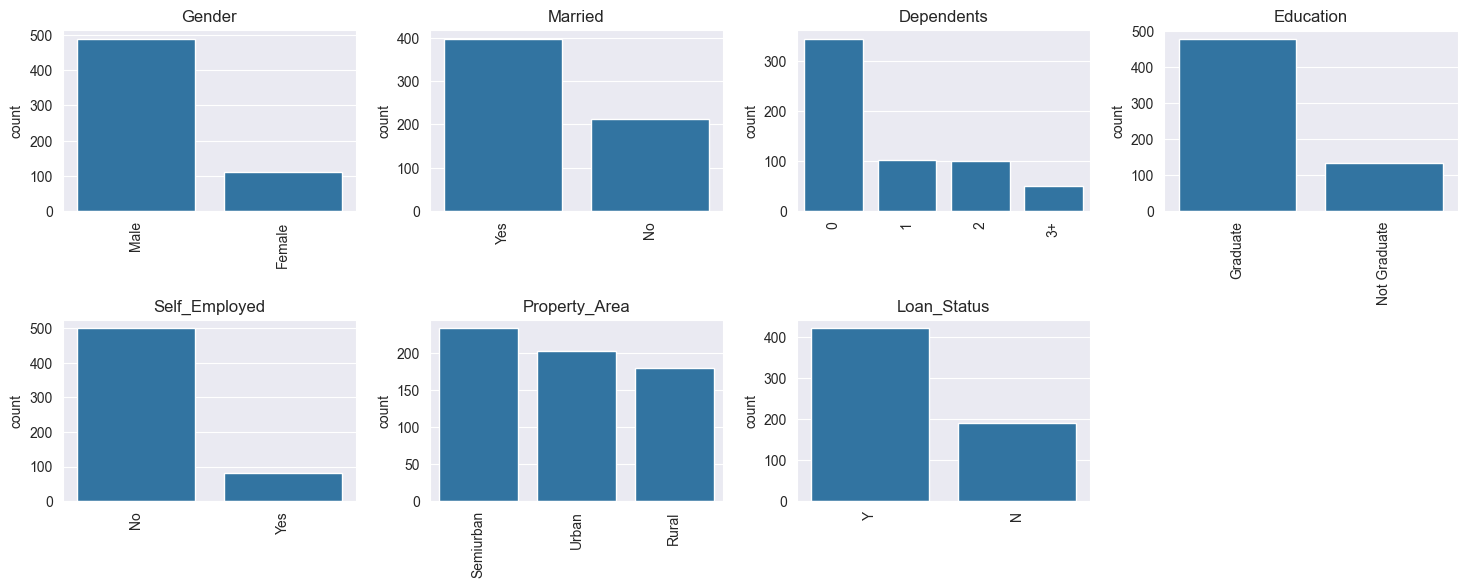

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of categorical features
sns.set_style('darkgrid')
sns.set_palette('tab10')

obj = (df.dtypes == 'object')
categorical_cols = list(obj[obj].index)
plt.figure(figsize=(18, 40))
index = 1

for col in categorical_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=0.6, wspace=0.25) 
    sns.barplot(x = list(y.index), y = y).set_title(col)
    index += 1


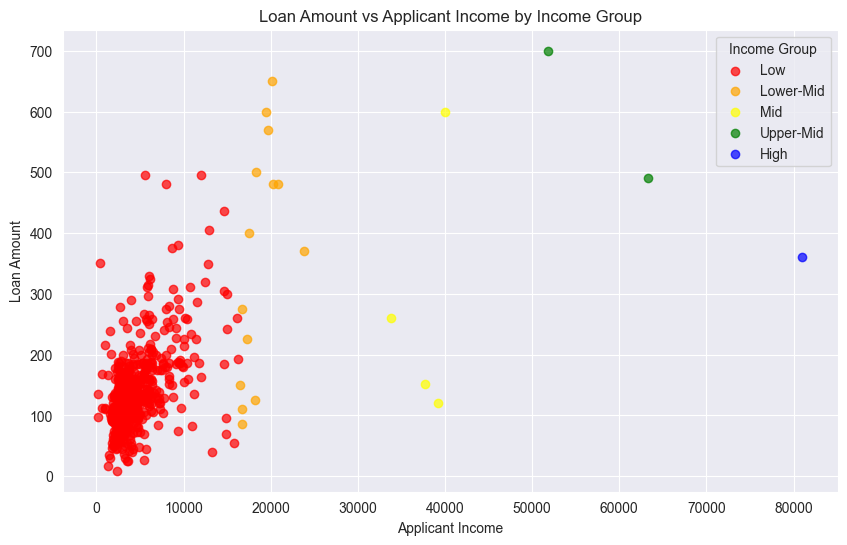

In [194]:
# Comparing the LoanAmount With the ApplicantIncome
df['IncomeGroup'] = pd.cut(df['ApplicantIncome'], bins=5, labels=['Low', 'Lower-Mid', 'Mid', 'Upper-Mid', 'High'])

color = {
    'Low': 'red',
    'Lower-Mid': 'orange',
    'Mid': 'yellow',
    'Upper-Mid': 'green',
    'High': 'blue'  
}

plt.figure(figsize=(10, 6))

for group in df['IncomeGroup'].unique():
    group_data = df[df['IncomeGroup'] == group]
    plt.scatter(group_data['ApplicantIncome'], group_data['LoanAmount'],
                 color=color[group], label=group, alpha=0.7)
                 
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Applicant Income by Income Group')
plt.legend(title='Income Group')
plt.grid(True)
plt.show()


In [195]:
# Most of the Eda needed with Profile Report
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling report")
profile.to_widgets()



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 922.50it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [196]:
# Check the data types of the columns
df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
IncomeGroup          category
dtype: object

In [197]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [198]:
# Check the Object columns in the dataset
df.select_dtypes(include=['object']).columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [199]:
# Check the Numeric columns in the dataset
df.select_dtypes(include=['int64', 'float64']).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [200]:
# Separate features (X) and target variable (y)
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [201]:
# Convert categorical variables to numerical using one-hot encoding
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
            'Loan_Amount_Term', 'Credit_History']
cat_cols = ['Gender', 'Married', 'Dependents', 'Education',
             'Self_Employed', 'Property_Area']

In [202]:
# Display numeric and categorical columns along with the total column count
print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)
print("Total columns:", len(num_cols) + len(cat_cols))


Numeric columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
Total columns: 11


In [203]:
# importing necessary libraries for model building
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from custom_transformers import convert_to_df
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

np.random.seed(42)

# Define the imputer for numeric and categorical columns
imputer = ColumnTransformer([
    ('num_imputer', SimpleImputer(strategy='mean'), num_cols),
    ('cat_imputer', SimpleImputer(strategy='most_frequent'), cat_cols)
    ],remainder='drop')

fe = FunctionTransformer()

# Define the categorical features and the encoder
le = LabelEncoder()
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
transformed = ColumnTransformer(
     transformers =  [("onehot_encoder",
                       onehot_encoder,
                         cat_cols)],
                           remainder='passthrough')

all_cols = num_cols + cat_cols

# Function to convert numpy array to DataFrame
def convert_to_df(arr, columns):
    return pd.DataFrame(arr, columns=columns)

# Building Decision Tree model
dt_model = Pipeline(steps=[
    ('imputer', imputer),
    ('to_df', FunctionTransformer(convert_to_df, kw_args={'columns': num_cols + cat_cols})),  
    ('fe', fe),     
    ('encoder', transformed),
    ('model', DecisionTreeClassifier(
        max_depth=5,
        min_samples_split=5,
        min_samples_leaf=4,
        random_state=42,
    )),
])

# Building Random Forest model
rf_model = Pipeline(steps=[
    ('imputer', imputer),
    ('to_df', FunctionTransformer(convert_to_df, kw_args={'columns': num_cols + cat_cols})),
    ('fe', fe),     
    ('encoder', transformed),
    ('model', RandomForestClassifier(
        max_depth=3,
        min_samples_split=4,
        min_samples_leaf=5,
        class_weight='balanced',
        random_state=42)),
])

# Building Logistic Regression model
log_r_model = Pipeline(steps=[
    ('imputer', imputer),
    ('to_df', FunctionTransformer(convert_to_df, kw_args={'columns': num_cols + cat_cols})),
    ('fe', fe),     
    ('encoder', transformed),
    ('scalar', StandardScaler()),
    ('model', LogisticRegression(
        max_iter=1000,
        C=0.1, 
        penalty='l1',
        solver='liblinear',
        random_state=42,
    )),
])

# Building SVC model
svc_model = Pipeline(steps=[
    ('imputer', imputer),
    ('to_df', FunctionTransformer(convert_to_df, kw_args={'columns': num_cols + cat_cols})), 
    ('fe', fe),     
    ('encoder', transformed),
    ('scaler', StandardScaler(with_mean=False)),
    ('model', SVC(
        C=1,
        gamma='scale',
        kernel='rbf',
        class_weight='balanced',
        random_state=42,
    )),
])

# Building XGBoost model
xboost_model = Pipeline(steps=[
    ('imputer', imputer),
    ('to_df', FunctionTransformer(convert_to_df, kw_args={'columns': num_cols + cat_cols})),
    ('fe', fe),     
    ('encoder', transformed),
    ('model', XGBClassifier(
        colsample_bytree=0.9,
        max_depth=3,
        min_child_weight=10,
        n_estimators=100,
        subsample=0.9,
    )),
])



x = df.drop('Loan_Status', axis=1)
y = le.fit_transform(df['Loan_Status'])

# Prepare test features (no target column)
x_test = df_test.copy()


In [204]:
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Splitting the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Defining the parameter grid for hyperparameter tuning
# Decision Tree Classifier
param_grid_dt = {
    'model__max_depth': [3, 5, 7, 10],  
    'model__min_samples_split': [5, 10, 20],  
    'model__min_samples_leaf': [2, 4, 5],  
    'model__max_features': [None, 'sqrt', 'log2']  
}

grid_search_dt = GridSearchCV(
    estimator=dt_model,
      param_grid=param_grid_dt,
        cv=5,
          scoring = 'f1',
          n_jobs=1)

grid_search_dt.fit(x_train, y_train)
best_model_dt = grid_search_dt.best_estimator_
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)

# Random Forest Classifier
param_grid_rf = {
    'model__n_estimators': [100, 150],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [5, 10],
    'model__min_samples_leaf': [2, 4],
}

grid_search = GridSearchCV(
    estimator=rf_model,
      param_grid=param_grid_rf,
        cv=5,
          scoring = 'f1')

grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
print("Best parameters for Random forest:", grid_search.best_params_)

# Logistic Regression Classifier
param_grid_log_r = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear'],
}

grid_search_log_r = GridSearchCV(
    estimator=log_r_model,
      param_grid=param_grid_log_r,
        cv=5,
          scoring = 'f1',
          n_jobs=1)

grid_search_log_r.fit(x_train, y_train)
best_model_log_r = grid_search_log_r.best_estimator_
print("Best parameters for Logistic Regression:", grid_search_log_r.best_params_)

# SVC Classifier
param_grid_svc = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__gamma': ['scale', 'auto'],
}
grid_search_svc = GridSearchCV(
    estimator=svc_model,
      param_grid=param_grid_svc,
        cv=5,
          scoring = 'f1',
          n_jobs=1)

grid_search_svc.fit(x_train, y_train)
best_model_svc = grid_search_svc.best_estimator_
print("Best parameters for SVC:", grid_search_svc.best_params_)

# XGBoost Classifier
param_grid_xgboost = {
    'model__n_estimators': [100, 150, 200],
    'model__max_depth': [3, 5, 7],
    'model__min_child_weight': [1, 5, 10],
    'model__subsample': [0.7, 0.8, 0.9],
    'model__colsample_bytree': [0.7, 0.8, 0.9]
}
grid_search_xgboost = GridSearchCV(
    estimator=xboost_model,
      param_grid=param_grid_xgboost,
        cv=5,
          scoring = 'f1',
          n_jobs=1)

grid_search_xgboost.fit(x_train, y_train,)
best_model_xgboost = grid_search_xgboost.best_estimator_
print("Best parameters for XGBoost:", grid_search_xgboost.best_params_)


Best parameters for Decision Tree: {'model__max_depth': 3, 'model__max_features': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 20}
Best parameters for Random forest: {'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best parameters for Logistic Regression: {'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best parameters for SVC: {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'poly'}
Best parameters for XGBoost: {'model__colsample_bytree': 0.8, 'model__max_depth': 3, 'model__min_child_weight': 5, 'model__n_estimators': 100, 'model__subsample': 0.9}


In [205]:
# Defining the Columns of our dataset
print(x_train.columns)
print(x_test.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'IncomeGroup'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


### Desicion Tree Model

In [206]:
# Fitting the Decision Tree model
print("The decisiontree score:")
dt_model.fit(x_train, y_train)

# Prediction for train and test data
y_train_pred = dt_model.predict(x_train)
y_val_pred = dt_model.predict(x_val)
# Accuracy score for train and test data
dt_model.score(x_val, y_val)

The decisiontree score:


0.8130081300813008

In [207]:
# Classification report for Decision Tree
print("Classification report for Decision Tree:")
print(classification_report(y_val,y_val_pred))

Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.80      0.53      0.63        38
           1       0.82      0.94      0.87        85

    accuracy                           0.81       123
   macro avg       0.81      0.73      0.75       123
weighted avg       0.81      0.81      0.80       123



In [208]:
# Cross-validation for Decision Tree
cv_scores = cross_val_score(dt_model, x_train, y_train, cv=5, scoring='f1')
print(f"Cross-validation scores For Desicion Tree: {cv_scores}")
print(f"Mean cross-validation score For Desicion Tree: {cv_scores.mean()}")

Cross-validation scores For Desicion Tree: [0.85135135 0.85517241 0.86486486 0.81632653 0.82119205]
Mean cross-validation score For Desicion Tree: 0.8417814427203394


In [209]:
# Confusing the Decision Tree model
print("Confusion matrix for Decision Tree:")
conf_matrix = confusion_matrix(y_val, y_val_pred)
print(conf_matrix)


Confusion matrix for Decision Tree:
[[20 18]
 [ 5 80]]


In [210]:
# Training set performance
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Test set performance
test_accuracy = accuracy_score(y_val, y_val_pred)
test_precision = precision_score(y_val, y_val_pred)
test_recall = recall_score(y_val, y_val_pred)
test_f1 = f1_score(y_val, y_val_pred)

# Print the results
print("Training Set Performance For Desicion Tree:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

print("\nTest Set Performance For Desicion Tree:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")


Training Set Performance For Desicion Tree:
Accuracy: 0.8228105906313645
Precision: 0.8063725490196079
Recall: 0.9762611275964391
F1 Score: 0.8832214765100671

Test Set Performance For Desicion Tree:
Accuracy: 0.8130081300813008
Precision: 0.8163265306122449
Recall: 0.9411764705882353
F1 Score: 0.8743169398907104


In [211]:
predictions = dt_model.predict(x_val)
print(np.unique(predictions, return_counts=True))

(array([0, 1]), array([25, 98]))


### Random Forest Model

In [212]:
# Fitting The Random Forest model
print("The RandomForest score:")
rf_model.fit(x_train, y_train)

# Prediction for train and test data
y_train_pred = rf_model.predict(x_train)
y_val_pred = rf_model.predict(x_val)

# Accuracy score for train and test data
rf_model.score(x_val, y_val)

The RandomForest score:


0.8536585365853658

In [213]:
# Classification report for Random Forest
print("Classification report for Random Forest:")
print(classification_report(y_val, y_val_pred))

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.58      0.71        38
           1       0.84      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123



In [214]:
# Cross-validation for Random Forest
cv_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='f1')
print(f"Cross-validation scores For Random Forest: {cv_scores}")
print(f"Mean cross-validation score For Random Forest: {cv_scores.mean()}")

Cross-validation scores For Random Forest: [0.83561644 0.87248322 0.84931507 0.81632653 0.86666667]
Mean cross-validation score For Random Forest: 0.8480815851209474


In [215]:
# Confusing the Random Forest model
print("Confusion matrix for Random Forest:")
conf_matrix = confusion_matrix(y_val, y_val_pred)
print(conf_matrix)


Confusion matrix for Random Forest:
[[22 16]
 [ 2 83]]


In [216]:
# Training set performance
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Test set performance
test_accuracy = accuracy_score(y_val, y_val_pred)
test_precision = precision_score(y_val, y_val_pred)
test_recall = recall_score(y_val, y_val_pred)
test_f1 = f1_score(y_val, y_val_pred)

# Print the results
print("Training Set Performance For Random Forest:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

print("\nTest Set Performance For Random Forest:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")


Training Set Performance For Random Forest:
Accuracy: 0.8044806517311609
Precision: 0.7903614457831325
Recall: 0.973293768545994
F1 Score: 0.8723404255319149

Test Set Performance For Random Forest:
Accuracy: 0.8536585365853658
Precision: 0.8383838383838383
Recall: 0.9764705882352941
F1 Score: 0.9021739130434783


In [217]:
predictions = rf_model.predict(x_val)
print(np.unique(predictions, return_counts=True))


(array([0, 1]), array([24, 99]))


### Logistic Regression Model

In [218]:
# Fittin the Logistic Regression model
print("The Logistic Regression score:")

print("The decisiontree score:")
log_r_model.fit(x_train, y_train)

# Prediction for train and test data
y_train_pred = log_r_model.predict(x_train)
y_val_pred = log_r_model.predict(x_val)

# Accuracy score for train and test data
log_r_model.score(x_val, y_val)

The Logistic Regression score:
The decisiontree score:


0.8536585365853658

In [219]:
# Classification Report for Logistic Regression
print("Classification report for Logistic Regression:")
print(classification_report(y_val, y_val_pred))

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [220]:
# Cross-validation for Logistic Regression
cv_scores = cross_val_score(log_r_model, x_train, y_train, cv=5, scoring='f1')
print(f"Cross-validation scores For Logistic Regression: {cv_scores}")
print(f"Mean cross-validation score For Logistic Regression: {cv_scores.mean()}")

Cross-validation scores For Logistic Regression: [0.86842105 0.87581699 0.88       0.8627451  0.8627451 ]
Mean cross-validation score For Logistic Regression: 0.8699456484348126


In [221]:
# Confusing the Random Logistic Regression model
print("Confusion matrix for Logistic Regression:")
conf_matrix = confusion_matrix(y_val, y_val_pred)
print(conf_matrix)


Confusion matrix for Logistic Regression:
[[21 17]
 [ 1 84]]


In [222]:
# Training set performance
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Test set performance
test_accuracy = accuracy_score(y_val, y_val_pred)
test_precision = precision_score(y_val, y_val_pred)
test_recall = recall_score(y_val, y_val_pred)
test_f1 = f1_score(y_val, y_val_pred)

# Print the results
print("Training Set Performance For Logistic Regression:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

print("\nTest Set Performance For Logistic Regression:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")


Training Set Performance For Logistic Regression:
Accuracy: 0.7983706720977597
Precision: 0.7806603773584906
Recall: 0.9821958456973294
F1 Score: 0.8699080157687253

Test Set Performance For Logistic Regression:
Accuracy: 0.8536585365853658
Precision: 0.8316831683168316
Recall: 0.9882352941176471
F1 Score: 0.9032258064516129


In [223]:
predictions = log_r_model.predict(x_val)
print(np.unique(predictions, return_counts=True))

(array([0, 1]), array([ 22, 101]))


### Svc Model

In [224]:
# Fitting the Svc Model
print("The Support vector classifier score:")

svc_model.fit(x_train, y_train)

# Prediction for train and test data
y_train_pred = svc_model.predict(x_train)
y_val_pred = svc_model.predict(x_val)

# Accuracy score for train and test data
svc_model.score(x_val, y_val)

The Support vector classifier score:


0.8373983739837398

In [225]:
# Classification report for Svc
print("Classification report for Svc:")
print(classification_report(y_val, y_val_pred))

Classification report for Svc:
              precision    recall  f1-score   support

           0       0.85      0.58      0.69        38
           1       0.84      0.95      0.89        85

    accuracy                           0.84       123
   macro avg       0.84      0.77      0.79       123
weighted avg       0.84      0.84      0.83       123



In [226]:
# Cross-validation for Svc
cv_scores = cross_val_score(svc_model, x_train, y_train, cv=5, scoring='f1')
print(f"Cross-validation scores For Svc: {cv_scores}")
print(f"Mean cross-validation score For Svc: {cv_scores.mean()}")

Cross-validation scores For Svc: [0.85135135 0.87248322 0.85714286 0.85526316 0.85526316]
Mean cross-validation score For Svc: 0.8583007491520384


In [227]:
# Confusing the Svc model
print("Confusion matrix for Svc:")
conf_matrix = confusion_matrix(y_val, y_val_pred)
print(conf_matrix)


Confusion matrix for Svc:
[[22 16]
 [ 4 81]]


In [228]:
# Training set performance
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Test set performance
test_accuracy = accuracy_score(y_val, y_val_pred)
test_precision = precision_score(y_val, y_val_pred)
test_recall = recall_score(y_val, y_val_pred)
test_f1 = f1_score(y_val, y_val_pred)

# Print the results
print("Training Set Performance For Svc:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

print("\nTest Set Performance For Svc:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")


Training Set Performance For Svc:
Accuracy: 0.814663951120163
Precision: 0.7956730769230769
Recall: 0.9821958456973294
F1 Score: 0.8791500664010624

Test Set Performance For Svc:
Accuracy: 0.8373983739837398
Precision: 0.8350515463917526
Recall: 0.9529411764705882
F1 Score: 0.8901098901098901


In [229]:
predictions = svc_model.predict(x_val)
print(np.unique(predictions, return_counts=True))


(array([0, 1]), array([26, 97]))


### Xgboost Model

In [235]:
# Fitting the xgboost model
print("The XGBClassifier score:")
xboost_model.fit(x_train, y_train)

# Prediction for train and test data
y_train_pred = xboost_model.predict(x_train)
y_val_pred = xboost_model.predict(x_val)

# Accuracy score for train and test data
xboost_model.score(x_val, y_val)

The XGBClassifier score:


0.8292682926829268

In [236]:
# Classification Report for XGBoost Model
print("Classification report for XGBoost:")
print(classification_report(y_val, y_val_pred))

Classification report for XGBoost:
              precision    recall  f1-score   support

           0       0.76      0.66      0.70        38
           1       0.86      0.91      0.88        85

    accuracy                           0.83       123
   macro avg       0.81      0.78      0.79       123
weighted avg       0.83      0.83      0.83       123



In [237]:
# Cross-validation for XGBoost
cv_scores = cross_val_score(xboost_model, x_train, y_train, cv=5, scoring='f1')
print(f"Cross-validation scores For Xgboost: {cv_scores}")
print(f"Mean cross-validation score For Xgboost: {cv_scores.mean()}")

Cross-validation scores For Xgboost: [0.82517483 0.84722222 0.83098592 0.81578947 0.83333333]
Mean cross-validation score For Xgboost: 0.8305011539815098


In [238]:
# Confusing the XGBoost model
print("Confusion matrix for Xgboost:")
conf_matrix = confusion_matrix(y_val, y_val_pred)
print(conf_matrix)

Confusion matrix for Xgboost:
[[25 13]
 [ 8 77]]


In [239]:
# Training set performance
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Test set performance
test_accuracy = accuracy_score(y_val, y_val_pred)
test_precision = precision_score(y_val, y_val_pred)
test_recall = recall_score(y_val, y_val_pred)
test_f1 = f1_score(y_val, y_val_pred)

# Print the results
print("Training Set Performance For Xgboost:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

print("\nTest Set Performance For Xgboost:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")


Training Set Performance For Xgboost:
Accuracy: 0.8594704684317719
Precision: 0.8507853403141361
Recall: 0.9643916913946587
F1 Score: 0.9040333796940194

Test Set Performance For Xgboost:
Accuracy: 0.8292682926829268
Precision: 0.8555555555555555
Recall: 0.9058823529411765
F1 Score: 0.88
